In [455]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

mv_df = pd.read_csv('../Resources/movie_metadata_adjusted_revenue_starpower.csv')

In [456]:
mv_df.dtypes

Column1           int64
title            object
budget           object
popularity      float64
release_date      int64
revenue          object
runtime           int64
vote_average    float64
vote_count        int64
star_power        int64
first_genre      object
dtype: object

In [414]:
mv_df['revenue'] = mv_df['revenue'].str.replace(',','').astype(float).astype(int)
mv_df['budget'] = mv_df['budget'].str.replace(',','').astype(float).astype(int)
mv_df= pd.concat([mv_df,pd.get_dummies(mv_df['first_genre'], prefix='genre')], axis=1)
mv_df.drop(['first_genre'], axis=1, inplace=True)

In [416]:
#remove outliers from Budget & Revenue columns

from scipy import stats
mv_df2 = mv_df[(np.abs(stats.zscore(mv_df['revenue'])) < 3)]
mv_df3 = mv_df2[(np.abs(stats.zscore(mv_df2['budget'])) < 3)]
mv_df3.shape


(1057, 24)

In [417]:
X = mv_df3[[
    'budget',
    'popularity',
    'runtime',
    'vote_average',
    'vote_count',
    'star_power',
    'genre_Action & Adventure',
    'genre_Animation',
    'genre_Art House & International',
    'genre_Classics',
    'genre_Comedy',
    'genre_Cult Movies',
    'genre_Drama',
    'genre_Horror',
    'genre_Kids & Family',
    'genre_Mystery & Suspense',
    'genre_None',
    'genre_Romance',
    'genre_Science Fiction & Fantasy',
    'genre_Western']]
y = mv_df3['revenue'].values.reshape(-1,1)
print(X.shape, y.shape)

(1057, 20) (1057, 1)


In [419]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## trying different test sizes give vastly different testing scores - this and the 

In [420]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\User\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardSca

In [440]:
model = Ridge(alpha = 0.1)
model.fit(X_train_scaled, y_train_scaled)
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")
model.coef_

coefs = list(model.coef_[0])
cols = list(mv_df3)

col_coefs
    
    

Training Score: 0.5127740730305966
Testing Score: 0.5554512834277741


TypeError: append() takes exactly one argument (2 given)

Text(0.5, 1.0, 'Residual Plot')

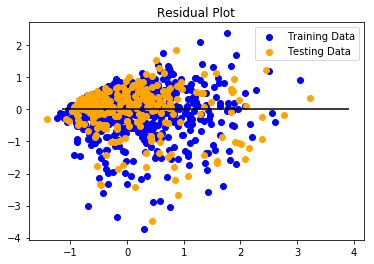

In [422]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")

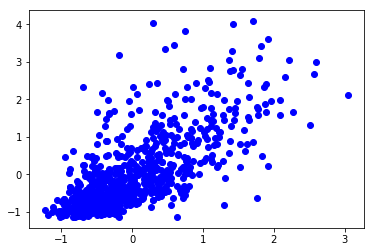

In [425]:
plt.scatter(model.predict(X_train_scaled),  y_train_scaled, c="blue", label="Training Data")